In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [12]:
df = pd.read_csv("data\cleaned_insurance.csv")
target_col = 'charges'
if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found")

report = sv.analyze(df, target_feat='charges') # defining target column
report.show_html('reports\sweetviz_report.html') # generating the report


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report reports\sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
# separating target from features in dataframe
X = df.drop(columns=[target_col])
y = df[target_col]

In [15]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_df = X_train.copy()
train_df['charges'] = y_train

test_df = X_test.copy()
test_df['charges'] = y_test

compare_report = sv.compare([train_df, "Training Data"],[test_df, "Test Data"],target_feat="charges")
compare_report.show_html("reports\sweetviz_train_test_comparison.html")

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report reports\sweetviz_train_test_comparison.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# train the model
use_xgboost = True  # False to use RandomForest instead

if use_xgboost:
    model = XGBRegressor(n_estimators=300, learning_rate=0.05, random_state=42)
else:
    model = RandomForestRegressor(n_estimators=300, random_state=42)

model.fit(X_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
# predict and evaluate with MSE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"\nModel Test MSE: {mse:.2f}")


Model Test MSE: 21504042.28


C:\Users\Patricia Avram\AppData\Local\Temp\ipykernel_14444\3038299716.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='mako')


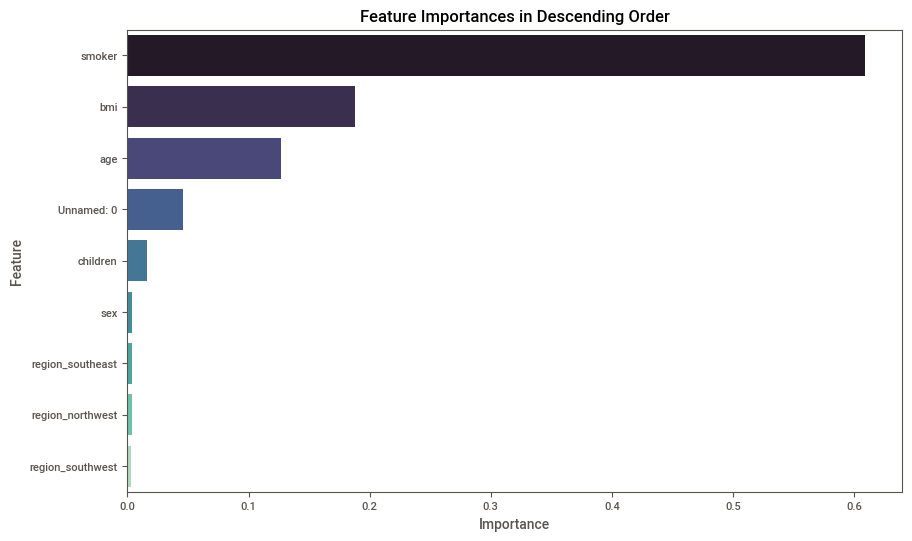

In [23]:
# variable importance analysis
importances = model.feature_importances_
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp = feat_imp.sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='mako')
plt.title('Feature Importances in Descending Order')
plt.show()

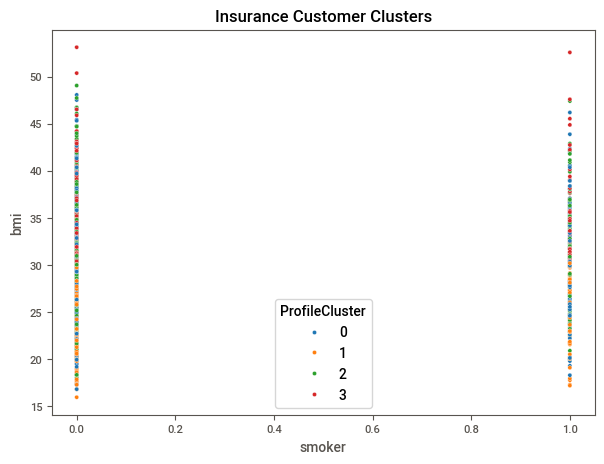

In [24]:
# clustering profiles based on top 3 features
top_features = feat_imp['Feature'].head(3).values
X_cluster = X[top_features]

kmeans = KMeans(n_clusters=4, random_state=42)
df['ProfileCluster'] = kmeans.fit_predict(X_cluster)

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x=top_features[0], y=top_features[1], hue='ProfileCluster', palette='tab10')
plt.title("Insurance Customer Clusters")
plt.show()

In [25]:
# summary by cluster
cluster_summary = df.groupby('ProfileCluster')[[target_col]].mean()
print("\nAverage Loss per Cluster:")
display(cluster_summary)


Average Loss per Cluster:


,charges
ProfileCluster,
0,13713.943476
1,7548.314299
2,17714.267211
3,12033.139278
